# JOB-A-THON
## Health Insurance Lead Prediction

#### 1. First, we will import all the python libraries that are required for this, which include NumPy for numerical calculations and scientific computing, Pandas for handling data and Matplotlib and Seaborn for visualization, sklearn is used as the most useful and robust library for machine learning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')

#### 2. Then we will load the data into the pandas dataframe.

In [2]:
df_train = pd.read_csv("C:\\Users\\nkr4n\\Documents\\JupyterNotebooks\\files\\jobathon\\train.csv")
df_test = pd.read_csv("C:\\Users\\nkr4n\\Documents\\JupyterNotebooks\\files\\jobathon\\test.csv")

In [3]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)
dupTrain = df_train.duplicated()
print(dupTrain.sum())
dupTest = df_test.duplicated()
print(dupTest.sum())

0
0


In [4]:
test_id_col = df_test["ID"]

#### 3. Then we will set a new column as train_flag which will be used for concatenating the two dataframes.

In [5]:
df_train['train_flag'] = 1
df_test['train_flag'] = 0
df_test['Response'] = None
print(df_train.shape, df_test.shape)

df_data = pd.concat((df_train, df_test))
print(df_data.shape)

(50882, 15) (21805, 15)
(72687, 15)


In [6]:
df_data.drop(['ID'],axis=1,inplace=True)

### EDA
#### We can check whether our data contains any missing values which we need to handle

In [7]:
df_data.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
train_flag                     0
dtype: int64

#### We can check the various characteristics of the data frame such as count of non-null features, dtype of features, memory usage etc.

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                72687 non-null  object 
 1   Region_Code              72687 non-null  int64  
 2   Accomodation_Type        72687 non-null  object 
 3   Reco_Insurance_Type      72687 non-null  object 
 4   Upper_Age                72687 non-null  int64  
 5   Lower_Age                72687 non-null  int64  
 6   Is_Spouse                72687 non-null  object 
 7   Health Indicator         55969 non-null  object 
 8   Holding_Policy_Duration  43833 non-null  object 
 9   Holding_Policy_Type      43833 non-null  float64
 10  Reco_Policy_Cat          72687 non-null  int64  
 11  Reco_Policy_Premium      72687 non-null  float64
 12  Response                 50882 non-null  object 
 13  train_flag               72687 non-null  int64  
dtypes: float64(2), int64(5

#### We can observe the dataset by checking few of the rows using head() method, which returns the first five records from the dataset.

In [9]:
df_data.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_flag
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,1
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,1
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,1
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,1


In [10]:
df_data.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,train_flag
count,72687.000000,72687.000000,72687.000000,43833.000000,72687.000000,72687.000000,72687.000000
mean,1737.573101,44.862713,42.741632,2.439486,15.122140,14194.856472,0.700015
std,1428.388402,17.293563,17.304194,1.029450,6.329295,6562.564815,0.458254
min,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000,0.000000
25%,527.000000,28.000000,27.000000,1.000000,12.000000,9254.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13200.000000,1.000000
75%,2681.000000,59.000000,57.000000,3.000000,20.000000,18144.000000,1.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43776.000000,1.000000


#### We use the method of binning which is used to create bins for continuous variables where continuous variables are converted to categorical variables. Because Region_Code contains a lot of unique values so its better to bin them in groups.

In [11]:
df_data['Region_Code_Bins']=pd.cut(df_data['Region_Code'],bins=[1,1000,2000,3000,4000,5000,6000,7000],labels=["1-1000","1000-2000","2000-3000","3000-4000","4000-5000","5000-6000","6000-7000"])

In [12]:
df_data = pd.get_dummies(data=df_data,columns=['Region_Code_Bins'])
df_data = df_data.drop(['Region_Code'], axis=1)

#### Handle the missing values 
We can do that by using few techniques, which are
Drop the missing values — If the dataset is huge and missing values are very few then we can directly drop the values, because it will not have much impact.
Replace with mean values — We can replace the missing values with mean values, but this is not advisable in case if the data has outliers.
Replace with median values — We can replace the missing values with median values, and it is recommended in case if the data has outliers.
Replace with mode values — We can do this in case of Categorical feature.
Regression — It can be used to predict the null value using other details from the dataset.
#### For our case, we will handle missing values by replacing it with mode value.

In [13]:
df_data['Health Indicator'] = np.where(df_data['Health Indicator'].isna(),df_data['Health Indicator'].mode()[0],df_data['Health Indicator'])
df_data['Holding_Policy_Duration'].replace({"14+":"15.0"},inplace=True)

In [14]:
df_data['Holding_Policy_Duration'].head(50)

0     15.0
1      NaN
2      1.0
3     15.0
4      3.0
5      5.0
6      NaN
7      9.0
8     14.0
9      7.0
10     NaN
11     3.0
12     1.0
13     NaN
14     2.0
15     NaN
16    11.0
17     NaN
18     1.0
19     NaN
20     3.0
21     NaN
22     NaN
23     NaN
24     1.0
25     NaN
26     NaN
27     NaN
28     NaN
29     7.0
30     3.0
31     NaN
32     NaN
33     2.0
34     NaN
35     NaN
36     5.0
37     NaN
38     1.0
39     3.0
40    15.0
41     3.0
42     2.0
43    14.0
44     NaN
45    10.0
46     NaN
47    15.0
48     8.0
49     7.0
Name: Holding_Policy_Duration, dtype: object

In [15]:
df_data['Holding_Policy_Type'].fillna(df_data['Holding_Policy_Type'].mode()[0], inplace=True)
df_data['Holding_Policy_Duration'].fillna(df_data['Holding_Policy_Duration'].median(), inplace=True)
df_data['City_Code'] = df_data['City_Code'].astype(str)
df_data['Reco_Policy_Cat'] = df_data['Reco_Policy_Cat'].astype(str)

In [16]:
df_data['Holding_Policy_Duration'] = df_data['Holding_Policy_Duration'].astype(float)
df_data['Holding_Policy_Duration'].head(50)

0     15.0
1      5.0
2      1.0
3     15.0
4      3.0
5      5.0
6      5.0
7      9.0
8     14.0
9      7.0
10     5.0
11     3.0
12     1.0
13     5.0
14     2.0
15     5.0
16    11.0
17     5.0
18     1.0
19     5.0
20     3.0
21     5.0
22     5.0
23     5.0
24     1.0
25     5.0
26     5.0
27     5.0
28     5.0
29     7.0
30     3.0
31     5.0
32     5.0
33     2.0
34     5.0
35     5.0
36     5.0
37     5.0
38     1.0
39     3.0
40    15.0
41     3.0
42     2.0
43    14.0
44     5.0
45    10.0
46     5.0
47    15.0
48     8.0
49     7.0
Name: Holding_Policy_Duration, dtype: float64

In [17]:
df_data.isnull().sum()

City_Code                         0
Accomodation_Type                 0
Reco_Insurance_Type               0
Upper_Age                         0
Lower_Age                         0
Is_Spouse                         0
Health Indicator                  0
Holding_Policy_Duration           0
Holding_Policy_Type               0
Reco_Policy_Cat                   0
Reco_Policy_Premium               0
Response                      21805
train_flag                        0
Region_Code_Bins_1-1000           0
Region_Code_Bins_1000-2000        0
Region_Code_Bins_2000-3000        0
Region_Code_Bins_3000-4000        0
Region_Code_Bins_4000-5000        0
Region_Code_Bins_5000-6000        0
Region_Code_Bins_6000-7000        0
dtype: int64

#### We will handle the Response column at a later stage

#### Handling the outliers in the data, i.e. the extreme values in the data. We can find the outliers in our data using a Boxplot.

<AxesSubplot:xlabel='Reco_Policy_Premium'>

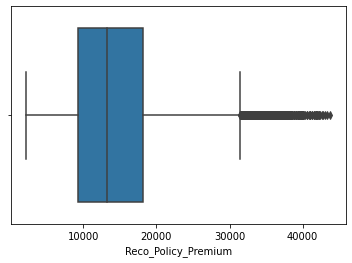

In [18]:
sns.boxplot(x=df_data['Reco_Policy_Premium'],data=df_data)

As we can observe from the above boxplot that the the normal range of data lies within the block and the outliers are denoted by the small circles in the extreme end of the graph.
So to handle it we can either drop the outlier values or replace the outlier values using IQR(Interquartile Range Method).
IQR is calculated as the difference between the 25th and the 75th percentile of the data. The percentiles can be calculated by sorting the selecting values at specific indices. The IQR is used to identify outliers by defining limits on the sample values that are a factor k of the IQR . The common value for the factor k is the value 1.5.

<AxesSubplot:xlabel='Reco_Policy_Premium'>

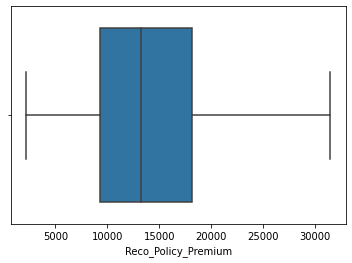

In [19]:
from scipy import stats
def removeOutlier(col):
    sorted(col)
    quant1,quant2 = col.quantile([0.25,0.75])
    IQR = quant2 - quant1
    lowerRange = quant1 - (1.5 * IQR)
    upperRange = quant2 + (1.5 * IQR)
    return lowerRange,upperRange

lowScore,highScore = removeOutlier(df_data['Reco_Policy_Premium'])
df_data['Reco_Policy_Premium'] = np.where(df_data['Reco_Policy_Premium']>highScore,highScore,df_data['Reco_Policy_Premium'])
df_data['Reco_Policy_Premium'] = np.where(df_data['Reco_Policy_Premium']<lowScore,lowScore,df_data['Reco_Policy_Premium'])

sns.boxplot(x=df_data['Reco_Policy_Premium'],data=df_data)

#### Finally, we can observe that our data is now free from outliers.

## EDA using visualization

#### We can visulaize the distribution of the values in the categorical columns to get the overview of the data

<AxesSubplot:xlabel='Response', ylabel='count'>

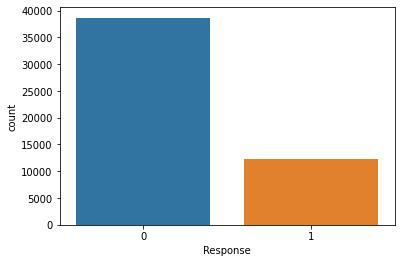

In [20]:
sns.countplot(x=df_data['Response'],data=df_data)

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

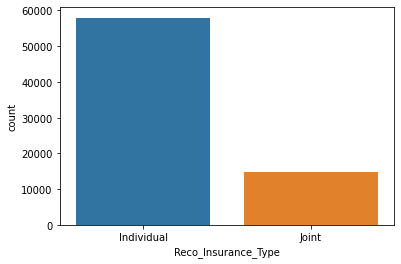

In [21]:
sns.countplot(x=df_data['Reco_Insurance_Type'],data=df_data)

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

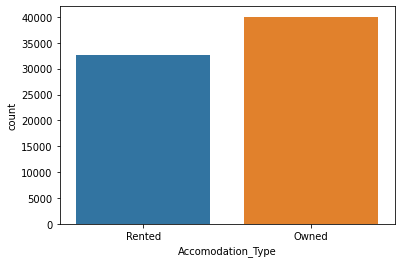

In [22]:
sns.countplot(x=df_data['Accomodation_Type'],data=df_data)

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

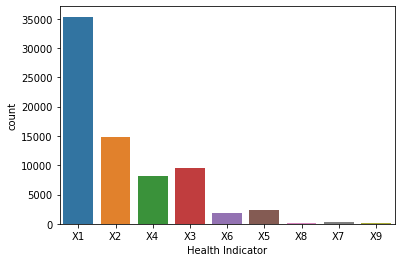

In [23]:
sns.countplot(x=df_data['Health Indicator'],data=df_data)

<AxesSubplot:xlabel='City_Code', ylabel='count'>

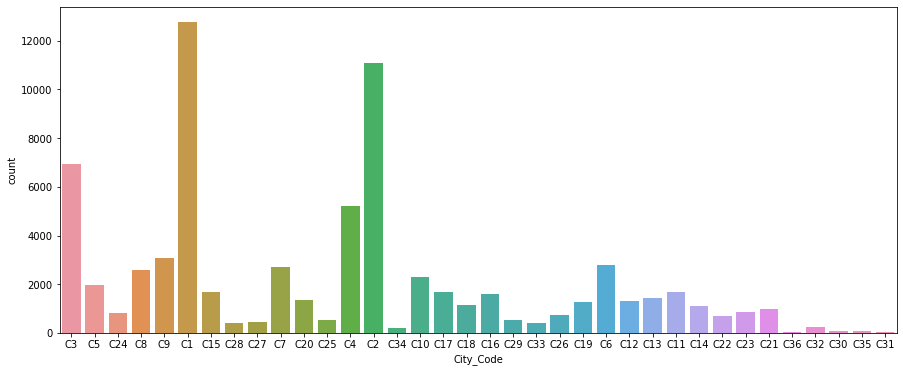

In [24]:
plt.figure(figsize=[15,6])
sns.countplot(x=df_data['City_Code'],data=df_data)

#### Using heatmap we can plot the correlation between the numerical features in our dataframe

<AxesSubplot:>

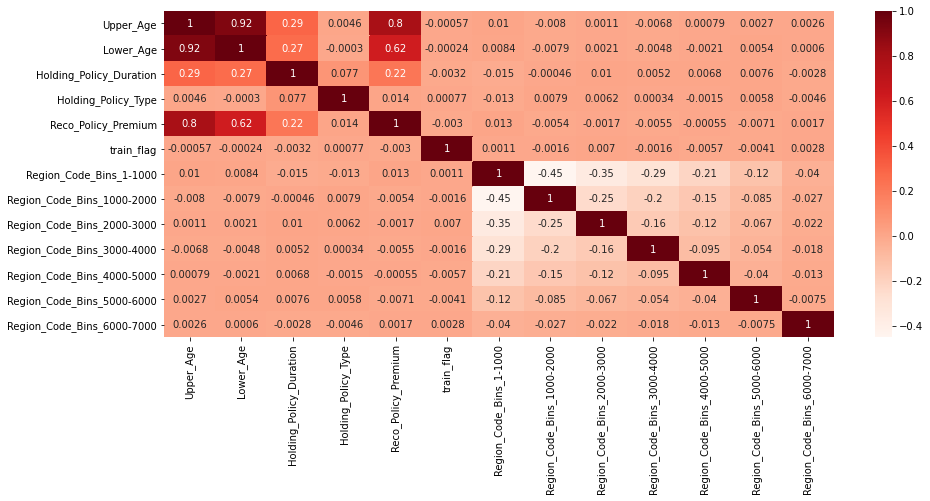

In [25]:
plt.figure(figsize=[15,6])
sns.heatmap(data=df_data.corr(),annot=True,cmap='Reds')

#### Normalizing and Scaling — Data Normalization or feature scaling is a process to standardize the range of features of the data as the range may vary a lot. So we can preprocess the data using ML algorithms. So for this, we will use MinMaxScaler for the numerical values.

##### We will scale the Reco_Policy_Premium, Upper_Age, Lower_Age columns in our data frame

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data['Reco_Policy_Premium'] = scaler.fit_transform(df_data[['Reco_Policy_Premium']])
df_data['Upper_Age'] = scaler.fit_transform(df_data[['Upper_Age']])
df_data['Lower_Age'] = scaler.fit_transform(df_data[['Lower_Age']])
df_data['Holding_Policy_Duration'] = scaler.fit_transform(df_data[['Holding_Policy_Duration']])
df_data['Holding_Policy_Type'] = scaler.fit_transform(df_data[['Holding_Policy_Type']])

In [27]:
df_data.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,train_flag,Region_Code_Bins_1-1000,Region_Code_Bins_1000-2000,Region_Code_Bins_2000-3000,Region_Code_Bins_3000-4000,Region_Code_Bins_4000-5000,Region_Code_Bins_5000-6000,Region_Code_Bins_6000-7000
0,C3,Rented,Individual,0.315789,0.338983,No,X1,1.000000,0.666667,22,0.323115,0,1,0,0,0,1,0,0,0
1,C5,Owned,Joint,1.000000,0.101695,No,X2,0.285714,0.666667,22,0.966959,0,1,0,1,0,0,0,0,0
2,C5,Owned,Individual,0.245614,0.271186,No,X1,0.000000,0.000000,19,0.180653,1,1,0,0,0,1,0,0,0
3,C24,Owned,Joint,0.596491,0.542373,No,X1,1.000000,0.666667,19,0.532888,0,1,0,0,0,0,1,0,0
4,C8,Rented,Individual,0.456140,0.474576,No,X2,0.142857,0.000000,16,0.281379,0,1,0,0,1,0,0,0,0


In [28]:
df_data.columns

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response', 'train_flag', 'Region_Code_Bins_1-1000',
       'Region_Code_Bins_1000-2000', 'Region_Code_Bins_2000-3000',
       'Region_Code_Bins_3000-4000', 'Region_Code_Bins_4000-5000',
       'Region_Code_Bins_5000-6000', 'Region_Code_Bins_6000-7000'],
      dtype='object')

#### Now We will extract the categorical columns from our dataframe

In [29]:
cat=df_data.select_dtypes(['object']).columns
cat

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Reco_Policy_Cat', 'Response'],
      dtype='object')

In [30]:
cat=cat[:-1]
cat

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Reco_Policy_Cat'],
      dtype='object')

### One hot Encoding using Pandas
#### Now we will use One hot Encoding to handle the categorical features

In [31]:
df_data = pd.get_dummies(data=df_data,columns=['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse','Health Indicator', 'Reco_Policy_Cat'])

In [32]:
df_data.shape

(72687, 87)

In [33]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Upper_Age                       72687 non-null  float64
 1   Lower_Age                       72687 non-null  float64
 2   Holding_Policy_Duration         72687 non-null  float64
 3   Holding_Policy_Type             72687 non-null  float64
 4   Reco_Policy_Premium             72687 non-null  float64
 5   Response                        50882 non-null  object 
 6   train_flag                      72687 non-null  int64  
 7   Region_Code_Bins_1-1000         72687 non-null  uint8  
 8   Region_Code_Bins_1000-2000      72687 non-null  uint8  
 9   Region_Code_Bins_2000-3000      72687 non-null  uint8  
 10  Region_Code_Bins_3000-4000      72687 non-null  uint8  
 11  Region_Code_Bins_4000-5000      72687 non-null  uint8  
 12  Region_Code_Bins_5000-6000      

#### Now we will again split the dataframe using the train_flag feature into train and test dataframe respectively

In [34]:
print(df_train.shape, df_test.shape)

(50882, 15) (21805, 15)


In [35]:
df_train, df_test = df_data[df_data.train_flag == 1], df_data[df_data.train_flag == 0]

In [36]:
df_train.drop(['train_flag'], inplace=True, axis=1)
df_test.drop(['train_flag'], inplace=True, axis=1)
df_test.drop(['Response'], inplace=True, axis=1)

In [37]:
print(df_train.shape, df_test.shape)

(50882, 86) (21805, 85)


In [38]:
del df_data

In [39]:
df_train['Response'] = df_train['Response'].astype(int)

### Train Test Split
#### Now using the train-test-split we will split the train and test data with a 80%-20% format

In [40]:
df_train, df_eval = train_test_split(df_train, test_size=0.2, random_state=42, shuffle=True, stratify=df_train['Response'])

In [41]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('Response')
label_col = 'Response'
print(feature_cols)

['Upper_Age', 'Lower_Age', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Premium', 'Region_Code_Bins_1-1000', 'Region_Code_Bins_1000-2000', 'Region_Code_Bins_2000-3000', 'Region_Code_Bins_3000-4000', 'Region_Code_Bins_4000-5000', 'Region_Code_Bins_5000-6000', 'Region_Code_Bins_6000-7000', 'City_Code_C1', 'City_Code_C10', 'City_Code_C11', 'City_Code_C12', 'City_Code_C13', 'City_Code_C14', 'City_Code_C15', 'City_Code_C16', 'City_Code_C17', 'City_Code_C18', 'City_Code_C19', 'City_Code_C2', 'City_Code_C20', 'City_Code_C21', 'City_Code_C22', 'City_Code_C23', 'City_Code_C24', 'City_Code_C25', 'City_Code_C26', 'City_Code_C27', 'City_Code_C28', 'City_Code_C29', 'City_Code_C3', 'City_Code_C30', 'City_Code_C31', 'City_Code_C32', 'City_Code_C33', 'City_Code_C34', 'City_Code_C35', 'City_Code_C36', 'City_Code_C4', 'City_Code_C5', 'City_Code_C6', 'City_Code_C7', 'City_Code_C8', 'City_Code_C9', 'Accomodation_Type_Owned', 'Accomodation_Type_Rented', 'Reco_Insurance_Type_Individual', '

In [42]:
cat_cols = feature_cols
cat_cols

['Upper_Age',
 'Lower_Age',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Premium',
 'Region_Code_Bins_1-1000',
 'Region_Code_Bins_1000-2000',
 'Region_Code_Bins_2000-3000',
 'Region_Code_Bins_3000-4000',
 'Region_Code_Bins_4000-5000',
 'Region_Code_Bins_5000-6000',
 'Region_Code_Bins_6000-7000',
 'City_Code_C1',
 'City_Code_C10',
 'City_Code_C11',
 'City_Code_C12',
 'City_Code_C13',
 'City_Code_C14',
 'City_Code_C15',
 'City_Code_C16',
 'City_Code_C17',
 'City_Code_C18',
 'City_Code_C19',
 'City_Code_C2',
 'City_Code_C20',
 'City_Code_C21',
 'City_Code_C22',
 'City_Code_C23',
 'City_Code_C24',
 'City_Code_C25',
 'City_Code_C26',
 'City_Code_C27',
 'City_Code_C28',
 'City_Code_C29',
 'City_Code_C3',
 'City_Code_C30',
 'City_Code_C31',
 'City_Code_C32',
 'City_Code_C33',
 'City_Code_C34',
 'City_Code_C35',
 'City_Code_C36',
 'City_Code_C4',
 'City_Code_C5',
 'City_Code_C6',
 'City_Code_C7',
 'City_Code_C8',
 'City_Code_C9',
 'Accomodation_Type_Owned',
 'Accomodation_

In [43]:
label_col, len(feature_cols), len(cat_cols)

('Response', 85, 85)

In [44]:
df_test[feature_cols].head()

,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Premium,Region_Code_Bins_1-1000,Region_Code_Bins_1000-2000,Region_Code_Bins_2000-3000,Region_Code_Bins_3000-4000,Region_Code_Bins_4000-5000,...,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22,Reco_Policy_Cat_3,Reco_Policy_Cat_4,Reco_Policy_Cat_5,Reco_Policy_Cat_6,Reco_Policy_Cat_7,Reco_Policy_Cat_8,Reco_Policy_Cat_9
0,0.210526,0.237288,0.357143,0.666667,0.333549,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.894737,0.881356,0.142857,0.666667,1.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.175439,0.203390,0.071429,1.000000,0.241689,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.087719,0.118644,0.142857,0.666667,0.236437,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,1.000000,0.285714,0.666667,0.694991,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
df_test[feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21805 entries, 0 to 21804
Data columns (total 85 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Upper_Age                       21805 non-null  float64
 1   Lower_Age                       21805 non-null  float64
 2   Holding_Policy_Duration         21805 non-null  float64
 3   Holding_Policy_Type             21805 non-null  float64
 4   Reco_Policy_Premium             21805 non-null  float64
 5   Region_Code_Bins_1-1000         21805 non-null  uint8  
 6   Region_Code_Bins_1000-2000      21805 non-null  uint8  
 7   Region_Code_Bins_2000-3000      21805 non-null  uint8  
 8   Region_Code_Bins_3000-4000      21805 non-null  uint8  
 9   Region_Code_Bins_4000-5000      21805 non-null  uint8  
 10  Region_Code_Bins_5000-6000      21805 non-null  uint8  
 11  Region_Code_Bins_6000-7000      21805 non-null  uint8  
 12  City_Code_C1                    

### Stacking
#### Stacking is an ensemble machine learning algorithm that learns how to combine the predictions from multiple well-performing machine learning models and use it to give better predictions.

#### The get_stacking() function below defines the StackingClassifier model by first defining a list of tuples for the eight base models as estimators, then defining the logistic regression model as final estimator to combine the predictions from the base models using 5-fold cross-validation.

In [46]:
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('ridge', RidgeClassifier()))
    level0.append(('sgd', SGDClassifier()))
    level0.append(('rf', RandomForestClassifier()))
    level0.append(('ada', AdaBoostClassifier(learning_rate=0.01)))
    level0.append(('lgbm', lgb.LGBMClassifier(boosting_type='dart')))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

#### Then we will fit our training data in our stacking model and finally predict our test data and then generate a csv file having the predictions according to the ID.

In [ ]:
final_model = get_stacking()
final_model.fit(df_train[feature_cols], df_train[label_col])
eval_score = accuracy_score(df_eval[label_col], final_model.predict(df_eval[feature_cols]))
roc_score = roc_auc_score(df_eval[label_col], final_model.predict_proba(df_eval[feature_cols])[:, 1])
print('Eval ACC: {}'.format(eval_score))
print('ROC: {}'.format(roc_score))
val_pred= final_model.predict_proba(df_test[feature_cols])[:,1]
output = pd.DataFrame({'ID': test_id_col,'Response': val_pred})
output.to_csv('submission.csv', index=False)

### The End